In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
import statsmodels.api as sm
pd.set_option('display.max_columns', 30)
# set_option displays the full dataset 

%matplotlib inline

In [2]:
hubub = pd.read_csv('data/hubNashville__311__Service_Requests.csv')

huboo = pd.read_excel (r'data/TrashHaulerReport-Nov2017-Nov2019_Final.xlsx', skiprows=1) #for an earlier version of Excel, you may need to use the file extension of 'xls'
huboo.head()

/opt/anaconda3/envs/env1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,2017-11-01 07:09:00,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089
1,25274,2017-11-01 07:42:00,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,2017-11-01 07:53:00,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,2017-11-01 08:28:00,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,2017-11-01 08:55:00,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066


In [3]:
huboo.tail()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
20221,267125,2019-11-01 16:03:00,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20222,267126,2019-11-01 16:08:00,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569
20223,267130,2019-11-01 16:13:00,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,2019-11-01 16:15:00,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187
20225,267137,2019-11-01 16:24:00,Trash - Curbside/Alley Missed Pickup,possibly others missed as well,"604 Somerset Ct, Nashville, TN 37217, United S...",37217.0,RED RIVER,2505,29.0,1.781360e+06,637742.006846


In [4]:
hubub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251264 entries, 0 to 251263
Data columns (total 21 columns):
Request #                     251264 non-null int64
Status                        251264 non-null object
Request Type                  251194 non-null object
Subrequest Type               216592 non-null object
Additional Subrequest Type    142369 non-null object
Date / Time Opened            251264 non-null object
Date / Time Closed            244738 non-null object
Request Origin                251264 non-null object
System of Origin ID           22672 non-null object
Contact Type                  25490 non-null object
Preferred Language            0 non-null float64
State Issue                   251264 non-null bool
Parent Request                2720 non-null float64
Closed When Created           251264 non-null bool
Address                       219018 non-null object
City                          217369 non-null object
Council District              217256 non-null float64

In [5]:
huboo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 11 columns):
Request Number      20226 non-null int64
Date Opened         20226 non-null datetime64[ns]
Request             20226 non-null object
Description         20197 non-null object
Incident Address    20217 non-null object
Zip Code            20151 non-null float64
Trash Hauler        19325 non-null object
Trash Route         19279 non-null object
Council District    20177 non-null float64
State Plan X        20198 non-null float64
State Plan Y        20198 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 1.7+ MB


# This is old work from hubub

In [6]:
sub = hubub[hubub['Subrequest Type']=='Missed Pickup - Trash Cart Service']
sub['Address'].nunique()

13834

.

The above doesn't really work because it is double-counting an address if it is a separate entry

.

Let's remove the clutter of having extra columns 

In [7]:
hubub.columns

Index(['Request #', 'Status', 'Request Type', 'Subrequest Type',
       'Additional Subrequest Type', 'Date / Time Opened',
       'Date / Time Closed', 'Request Origin', 'System of Origin ID',
       'Contact Type', 'Preferred Language', 'State Issue', 'Parent Request',
       'Closed When Created', 'Address', 'City', 'Council District', 'ZIP',
       'Latitude', 'Longitude', 'Mapped Location'],
      dtype='object')

In [8]:
# What the heck is 'Parent Request'?

hubub = hubub.drop(columns={'Request Origin', 'System of Origin ID',
       'Contact Type', 'Preferred Language', 'State Issue', 'Parent Request'})

In [9]:
hubub.Status.value_counts()

Closed         244734
In Progress      4237
New              1674
Assigned          351
Transferred       238
On Hold            24
Denied              3
Completed           1
In Process          1
Escalated           1
Name: Status, dtype: int64

In [10]:

# What's the difference between closed and completed? 


In [11]:
hubub['Request Type'].value_counts()

Trash, Recycling & Litter              116771
Streets, Roads & Sidewalks              71146
Other                                   37308
Property Violations                     15504
Electric & Water General                 2914
Transit                                  2824
Public Safety                            2747
Permits                                  1029
Parks                                     709
Planning & Zoning                         200
Education & Libraries                      21
Public Records Request                     10
Workforce & Jobs                            8
Submit Budget Ideas to Mayor Briley         2
STMDRN                                      1
Name: Request Type, dtype: int64

Named columns the same as Suneethi's 

In [12]:
hubub = hubub.rename(columns={'Request #': 'Request_Id', 'Request Type':'Request_Type',
                               'Subrequest Type': 'Subrequest_Type',
                               'Additional Subrequest Type': 'Additional_Subrequest',
                              'Date / Time Opened' :'DT_Opened', 'Date / Time Closed':'DT_Closed',
                              'Council District': 'Council_Dist', 'ZIP':'Zip', 'Latitude':'Lat',
                              'Longitude':'Long', 'Mapped Location': 'Location'})

We want to start parsing the dates and times so we can look at stuff by month

In [13]:
hubub['DT_Opened'].iloc[0]

'10/10/2018 04:14:00 PM'

In [14]:
hubub.drop(hubub[hubub['Request_Id']==0].index, inplace=True)

In [15]:
hubub[['Date_Only','Time_Only', 'AM_PM']]=hubub.DT_Opened.str.split(' ', expand=True)

In [16]:
hubub.head()

,Request_Id,Status,Request_Type,Subrequest_Type,Additional_Subrequest,DT_Opened,DT_Closed,Closed When Created,Address,City,Council_Dist,Zip,Lat,Long,Location,Date_Only,Time_Only,AM_PM
0,108110,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,10/10/2018 04:14:00 PM,03/05/2019 09:34:00 PM,False,413 Freda Villa,MADISON,8.0,37115,36.243960,-86.727210,"(36.24396, -86.72721)",10/10/2018,04:14:00,PM
1,122078,Closed,"Trash, Recycling & Litter",File a Trash or Recycling Complaint,Trash in Recycling Cart,12/07/2018 02:50:00 PM,12/07/2018 02:50:00 PM,True,"4906 Dakota Ave, Nashville, TN 37209, United S...",NASHVILLE,24.0,37209,36.147680,-86.846440,"(36.14768, -86.84644)",12/07/2018,02:50:00,PM
2,113730,Closed,"Streets, Roads & Sidewalks",Request New Sign,NaN,11/01/2018 10:00:00 AM,11/06/2018 11:15:00 AM,True,"873 Granada Ave, Nashville, TN 37206, United S...",NASHVILLE,5.0,37206,36.189230,-86.756430,"(36.18923, -86.75643)",11/01/2018,10:00:00,AM
3,124624,Closed,"Trash, Recycling & Litter",File a Trash or Recycling Complaint,Trash in Recycling Cart,12/19/2018 05:47:00 PM,12/19/2018 05:47:00 PM,False,4304 Lindawood Dr,NASHVILLE,34.0,37215,36.097154,-86.831878,"(36.0971543, -86.8318783)",12/19/2018,05:47:00,PM
4,108241,Closed,"Streets, Roads & Sidewalks",Street Lighting,Report Outage,10/10/2018 02:49:00 PM,10/24/2018 04:27:00 PM,True,"336 Blackman Rd, Nashville, TN 37211, United S...",NASHVILLE,26.0,37211,36.074580,-86.746960,"(36.07458, -86.74696)",10/10/2018,02:49:00,PM


In [17]:
hubub.sort_values(by = 'Date_Only', ascending=False)

,Request_Id,Status,Request_Type,Subrequest_Type,Additional_Subrequest,DT_Opened,DT_Closed,Closed When Created,Address,City,Council_Dist,Zip,Lat,Long,Location,Date_Only,Time_Only,AM_PM
246161,126861,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,12/31/2018 08:21:00 PM,01/07/2019 05:11:00 PM,False,1618 Sumner Ave,NASHVILLE,6.0,37206,36.185292,-86.739221,"(36.1852916, -86.7392211)",12/31/2018,08:21:00,PM
244505,126915,Closed,"Streets, Roads & Sidewalks",Street Lighting,Report Outage,12/31/2018 11:43:00 PM,01/10/2019 09:16:00 PM,False,1214 1st Ave S,NASHVILLE,17.0,37210,36.145290,-86.762496,"(36.14529019, -86.76249593)",12/31/2018,11:43:00,PM
249614,126683,Closed,"Streets, Roads & Sidewalks",Traffic Light Issue,NaN,12/31/2018 01:31:00 PM,01/03/2019 04:33:00 PM,False,OLD HICKORY BLVD / FRANKLIN PKE,BRENTWOOD,34.0,37027,36.037407,-86.786567,"(36.03740721, -86.78656698)",12/31/2018,01:31:00,PM
230428,126739,Closed,Electric & Water General,Blocked Drain,NaN,12/31/2018 03:20:00 PM,02/03/2019 01:43:00 AM,False,1836 25TH AVE N,NASHVILLE,21.0,37208,36.181570,-86.817550,"(36.18157, -86.81755)",12/31/2018,03:20:00,PM
244540,126779,Closed,"Trash, Recycling & Litter",Litter,NaN,12/31/2018 04:23:00 PM,01/02/2019 09:18:00 PM,False,E Campbell Rd & N Graycroft Ave,MADISON,8.0,37115,36.276597,-86.729544,"(36.276597, -86.729544)",12/31/2018,04:23:00,PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104069,35962,Closed,Electric & Water General,Power Outage,NaN,01/01/2018 12:40:00 AM,01/03/2018 07:41:00 PM,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2018,12:40:00,AM
103151,35966,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,01/01/2018 02:53:00 PM,01/03/2018 03:02:00 PM,True,1015 Maplewood Pl,NASHVILLE,8.0,37216,36.227550,-86.727430,"(36.22755, -86.72743)",01/01/2018,02:53:00,PM
97342,35968,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,01/01/2018 03:14:00 PM,04/17/2018 04:00:00 AM,True,907 N 16th St,NASHVILLE,6.0,37206,36.186170,-86.740370,"(36.18617, -86.74037)",01/01/2018,03:14:00,PM
92156,35971,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,01/01/2018 05:16:00 PM,01/03/2018 04:04:00 AM,True,1315 Gartland Ave,NASHVILLE,6.0,37206,36.179310,-86.745680,"(36.17931, -86.74568)",01/01/2018,05:16:00,PM


In [18]:
hubub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251264 entries, 0 to 251263
Data columns (total 18 columns):
Request_Id               251264 non-null int64
Status                   251264 non-null object
Request_Type             251194 non-null object
Subrequest_Type          216592 non-null object
Additional_Subrequest    142369 non-null object
DT_Opened                251264 non-null object
DT_Closed                244738 non-null object
Closed When Created      251264 non-null bool
Address                  219018 non-null object
City                     217369 non-null object
Council_Dist             217256 non-null float64
Zip                      217248 non-null object
Lat                      218029 non-null float64
Long                     218029 non-null float64
Location                 218029 non-null object
Date_Only                251264 non-null object
Time_Only                251264 non-null object
AM_PM                    251264 non-null object
dtypes: bool(1), float64(

In [19]:
def extract_month(date_and_time):
    """
    This function takes as input a date and time, as formatted in the crashes 
    dataframe and returns the month, as an integer.
    
    example input: "12/31/2018 11:10:00 PM"
    example output: 12
    
    example input: "01/01/2018 12:00:00 AM"
    example output: 1
    """
    # Your code here
    new_value = date_and_time.split('/')
    return int(new_value[0])
# But you could run it without "int"

In [20]:
extract_month('12/31/2018 02:03:00 PM')

12

In [21]:
hubub['Month_Only']= hubub.DT_Opened.apply(extract_month)

In [22]:
hubub.head()

,Request_Id,Status,Request_Type,Subrequest_Type,Additional_Subrequest,DT_Opened,DT_Closed,Closed When Created,Address,City,Council_Dist,Zip,Lat,Long,Location,Date_Only,Time_Only,AM_PM,Month_Only
0,108110,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,10/10/2018 04:14:00 PM,03/05/2019 09:34:00 PM,False,413 Freda Villa,MADISON,8.0,37115,36.243960,-86.727210,"(36.24396, -86.72721)",10/10/2018,04:14:00,PM,10
1,122078,Closed,"Trash, Recycling & Litter",File a Trash or Recycling Complaint,Trash in Recycling Cart,12/07/2018 02:50:00 PM,12/07/2018 02:50:00 PM,True,"4906 Dakota Ave, Nashville, TN 37209, United S...",NASHVILLE,24.0,37209,36.147680,-86.846440,"(36.14768, -86.84644)",12/07/2018,02:50:00,PM,12
2,113730,Closed,"Streets, Roads & Sidewalks",Request New Sign,NaN,11/01/2018 10:00:00 AM,11/06/2018 11:15:00 AM,True,"873 Granada Ave, Nashville, TN 37206, United S...",NASHVILLE,5.0,37206,36.189230,-86.756430,"(36.18923, -86.75643)",11/01/2018,10:00:00,AM,11
3,124624,Closed,"Trash, Recycling & Litter",File a Trash or Recycling Complaint,Trash in Recycling Cart,12/19/2018 05:47:00 PM,12/19/2018 05:47:00 PM,False,4304 Lindawood Dr,NASHVILLE,34.0,37215,36.097154,-86.831878,"(36.0971543, -86.8318783)",12/19/2018,05:47:00,PM,12
4,108241,Closed,"Streets, Roads & Sidewalks",Street Lighting,Report Outage,10/10/2018 02:49:00 PM,10/24/2018 04:27:00 PM,True,"336 Blackman Rd, Nashville, TN 37211, United S...",NASHVILLE,26.0,37211,36.074580,-86.746960,"(36.07458, -86.74696)",10/10/2018,02:49:00,PM,10


The problem here is that (other than the fact that we still need to convert to datetime in order to get all the values in value_counts(),) we still need to differentiate between month/2018 and month/2019. So the current idea is to use a rolling window instead. 

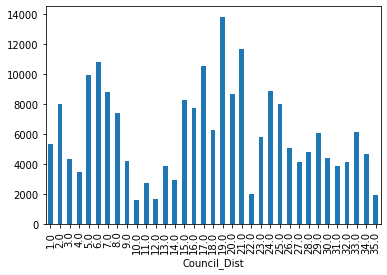

In [23]:
hubub.groupby('Council_Dist')['Subrequest_Type'].count().plot.bar();

In [24]:
%time 
hubub['DT_Opened'] = pd.to_datetime(hubub['DT_Opened'])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [25]:
hubub.head()

,Request_Id,Status,Request_Type,Subrequest_Type,Additional_Subrequest,DT_Opened,DT_Closed,Closed When Created,Address,City,Council_Dist,Zip,Lat,Long,Location,Date_Only,Time_Only,AM_PM,Month_Only
0,108110,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,2018-10-10 16:14:00,03/05/2019 09:34:00 PM,False,413 Freda Villa,MADISON,8.0,37115,36.243960,-86.727210,"(36.24396, -86.72721)",10/10/2018,04:14:00,PM,10
1,122078,Closed,"Trash, Recycling & Litter",File a Trash or Recycling Complaint,Trash in Recycling Cart,2018-12-07 14:50:00,12/07/2018 02:50:00 PM,True,"4906 Dakota Ave, Nashville, TN 37209, United S...",NASHVILLE,24.0,37209,36.147680,-86.846440,"(36.14768, -86.84644)",12/07/2018,02:50:00,PM,12
2,113730,Closed,"Streets, Roads & Sidewalks",Request New Sign,NaN,2018-11-01 10:00:00,11/06/2018 11:15:00 AM,True,"873 Granada Ave, Nashville, TN 37206, United S...",NASHVILLE,5.0,37206,36.189230,-86.756430,"(36.18923, -86.75643)",11/01/2018,10:00:00,AM,11
3,124624,Closed,"Trash, Recycling & Litter",File a Trash or Recycling Complaint,Trash in Recycling Cart,2018-12-19 17:47:00,12/19/2018 05:47:00 PM,False,4304 Lindawood Dr,NASHVILLE,34.0,37215,36.097154,-86.831878,"(36.0971543, -86.8318783)",12/19/2018,05:47:00,PM,12
4,108241,Closed,"Streets, Roads & Sidewalks",Street Lighting,Report Outage,2018-10-10 14:49:00,10/24/2018 04:27:00 PM,True,"336 Blackman Rd, Nashville, TN 37211, United S...",NASHVILLE,26.0,37211,36.074580,-86.746960,"(36.07458, -86.74696)",10/10/2018,02:49:00,PM,10


In [26]:
def extract_month_again(date_and_time):
 
    # Your code here
    new_value = date_and_time.split('-')
    return int(new_value[1])
# But you could run it without "int"

In [27]:
extract_month_again('2019-08-27 22:54:14')

8

In [28]:
hubub['DT_Opened'].iloc[0]

Timestamp('2018-10-10 16:14:00')

In [29]:
#hubub[['Date_Only','Time_Only']]=hubub.DT_Opened.str.split(' ', expand=True)

In [30]:
#hubub['Month_Only']= hubub.DT_Opened.apply(extract_month_again)

In [31]:
hubub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251264 entries, 0 to 251263
Data columns (total 19 columns):
Request_Id               251264 non-null int64
Status                   251264 non-null object
Request_Type             251194 non-null object
Subrequest_Type          216592 non-null object
Additional_Subrequest    142369 non-null object
DT_Opened                251264 non-null datetime64[ns]
DT_Closed                244738 non-null object
Closed When Created      251264 non-null bool
Address                  219018 non-null object
City                     217369 non-null object
Council_Dist             217256 non-null float64
Zip                      217248 non-null object
Lat                      218029 non-null float64
Long                     218029 non-null float64
Location                 218029 non-null object
Date_Only                251264 non-null object
Time_Only                251264 non-null object
AM_PM                    251264 non-null object
Month_Only       

In [32]:
hubub['DT_Opened'].astype('int64')

0         1539188040000000000
1         1544194200000000000
2         1541066400000000000
3         1545241620000000000
4         1539182940000000000
                 ...         
251259    1546024140000000000
251260    1551912360000000000
251261    1547240820000000000
251262    1545922620000000000
251263    1551283440000000000
Name: DT_Opened, Length: 251264, dtype: int64

In [33]:
# After we get date we want a rolling window '6M'
# We also need a 1w window to see what is duplicated 

# This begins new work with huboo data 

In [34]:
huboo.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,2017-11-01 07:09:00,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089
1,25274,2017-11-01 07:42:00,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,2017-11-01 07:53:00,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,2017-11-01 08:28:00,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,2017-11-01 08:55:00,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066


Rename columns

In [35]:
huboo.columns

Index(['Request Number', 'Date Opened', 'Request ', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y'],
      dtype='object')

In [36]:
huboo = huboo.rename(columns={'Request Number':'Request_Number', 'Date Opened':'Date_Opened', 'Request ':'Request',
       'Incident Address':'Incident_Address', 'Zip Code':'Zip', 'Trash Hauler':'Trash_Hauler', 'Trash Route':'Route',
       'Council District':'Council_District', 'State Plan X':'State_Plan_X', 'State Plan Y':'State_Plan_Y'})

Convert timestamp to int? 

In [37]:
huboo['Date_Opened'].iloc[0]

Timestamp('2017-11-01 07:09:00')

So no need to convert to datetime, it's already in datetime. But we need to get rid of timestamp 

In [45]:
huboo['Date_Opened_Month'] = huboo['Date_Opened'].dt.month



huboo['Date_Opened_Year'] = huboo['Date_Opened'].dt.year



In [46]:
huboo.head(35)

,Request_Number,Date_Opened,Request,Description,Incident_Address,Zip,Trash_Hauler,Route,Council_District,State_Plan_X,State_Plan_Y,Date_Opened_Month,Date_Opened_Year
0,25270,2017-11-01 07:09:00,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089,11,2017
1,25274,2017-11-01 07:42:00,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565,11,2017
2,25276,2017-11-01 07:53:00,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571,11,2017
3,25307,2017-11-01 08:28:00,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923,11,2017
4,25312,2017-11-01 08:55:00,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066,11,2017
5,25317,2017-11-01 09:08:00,Trash Collection Complaint,left trash cart in middle of driveway instead ...,3602 floral dr,37211.0,RED RIVER,4304,16.0,1.751660e+06,643215.201073,11,2017
6,25325,2017-11-01 09:29:00,Damage to Property,Trash/emptied Wednesday & now metal black-mail...,4721 Chalmers Dr,37215.0,RED RIVER,3303,34.0,1.726301e+06,637078.402245,11,2017
7,25327,2017-11-01 09:32:00,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1.731459e+06,666013.601229,11,2017
8,25330,2017-11-01 09:45:00,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,618749.342732,11,2017
9,25331,2017-11-01 09:45:00,Trash - Curbside/Alley Missed Pickup,"Trash missed Tuesday again, ALLEY",1206 Ireland St,37208.0,METRO,9208,19.0,1.733029e+06,668762.640891,11,2017


.




Now we want to isolate the misses




.

In [47]:
huboo.Request.value_counts()

Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Damage to Property                        257
Name: Request, dtype: int64

In [72]:
huboo[huboo['Request'].str.contains('miss|missed|Miss|Missed', na=False)]


# not super accurate 

,Request_Number,Date_Opened,Request,Description,Incident_Address,Zip,Trash_Hauler,Route,Council_District,State_Plan_X,State_Plan_Y,Date_Opened_Month,Date_Opened_Year
1,25274,2017-11-01 07:42:00,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565,11,2017
2,25276,2017-11-01 07:53:00,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571,11,2017
3,25307,2017-11-01 08:28:00,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923,11,2017
4,25312,2017-11-01 08:55:00,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066,11,2017
8,25330,2017-11-01 09:45:00,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,618749.342732,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,2019-11-01 16:03:00,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144,11,2019
20222,267126,2019-11-01 16:08:00,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569,11,2019
20223,267130,2019-11-01 16:13:00,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809,11,2019
20224,267134,2019-11-01 16:15:00,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187,11,2019


In [70]:
true_miss = huboo[huboo['Description'].str.contains('miss|missed|Miss|Missed', na=False)]
true_miss

,Request_Number,Date_Opened,Request,Description,Incident_Address,Zip,Trash_Hauler,Route,Council_District,State_Plan_X,State_Plan_Y,Date_Opened_Month,Date_Opened_Year
1,25274,2017-11-01 07:42:00,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565,11,2017
2,25276,2017-11-01 07:53:00,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571,11,2017
3,25307,2017-11-01 08:28:00,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923,11,2017
4,25312,2017-11-01 08:55:00,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066,11,2017
7,25327,2017-11-01 09:32:00,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1.731459e+06,666013.601229,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20219,267119,2019-11-01 15:58:00,Trash - Curbside/Alley Missed Pickup,church missed as wel,"1701 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.750025e+06,669155.312480,11,2019
20220,267121,2019-11-01 15:59:00,Trash - Curbside/Alley Missed Pickup,missed,"2709 Crestdale Dr, Nashville, TN 37214, United...",37214.0,RED RIVER,1502,15.0,1.770240e+06,676334.399319,11,2019
20223,267130,2019-11-01 16:13:00,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809,11,2019
20224,267134,2019-11-01 16:15:00,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187,11,2019


This was my initial attempt but I like true_misses better-- Hari helped with it 

In [50]:
misses = huboo[huboo['Request']!= 'Damage to Property']

In [51]:
misses.head()

,Request_Number,Date_Opened,Request,Description,Incident_Address,Zip,Trash_Hauler,Route,Council_District,State_Plan_X,State_Plan_Y,Date_Opened_Month,Date_Opened_Year
0,25270,2017-11-01 07:09:00,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089,11,2017
1,25274,2017-11-01 07:42:00,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565,11,2017
2,25276,2017-11-01 07:53:00,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571,11,2017
3,25307,2017-11-01 08:28:00,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923,11,2017
4,25312,2017-11-01 08:55:00,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066,11,2017


In [68]:
misses.Request.value_counts(dropna=False) #this dropna=False would count nan values too

Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Name: Request, dtype: int64

In [53]:
misses.Incident_Address.nunique()

13936

In [54]:
misses.Incident_Address.unique()

array(['3817 Crouch Dr', '4028 Clarksville Pike', '6528 Thunderbird Dr',
       ..., '2709 Crestdale Dr, Nashville, TN 37214, United States',
       '1621 Long Ave, Nashville, TN 37206, United States',
       '604 Somerset Ct, Nashville, TN 37217, United States'],
      dtype=object)

In [71]:
# convert zip to no float, make addresses uniform, use rolling window on the new dataframe, don't overcharge for an address

total should = trash-missed pickup + backdoor(str.contains missed) + collection complaint(str.contains missed) 

Don't forget to look at the three crews: Metro, Red River, Waste Industries at some point

In [77]:
Curbside = huboo[huboo['Request']== 'Trash - Curbside/Alley Missed Pickup']

total_miss = pd.merge(Curbside,true_miss)
total_miss.tail()

,Request_Number,Date_Opened,Request,Description,Incident_Address,Zip,Trash_Hauler,Route,Council_District,State_Plan_X,State_Plan_Y,Date_Opened_Month,Date_Opened_Year
9228,267119,2019-11-01 15:58:00,Trash - Curbside/Alley Missed Pickup,church missed as wel,"1701 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.750025e+06,669155.312480,11,2019
9229,267121,2019-11-01 15:59:00,Trash - Curbside/Alley Missed Pickup,missed,"2709 Crestdale Dr, Nashville, TN 37214, United...",37214.0,RED RIVER,1502,15.0,1.770240e+06,676334.399319,11,2019
9230,267130,2019-11-01 16:13:00,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809,11,2019
9231,267134,2019-11-01 16:15:00,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187,11,2019
9232,267137,2019-11-01 16:24:00,Trash - Curbside/Alley Missed Pickup,possibly others missed as well,"604 Somerset Ct, Nashville, TN 37217, United S...",37217.0,RED RIVER,2505,29.0,1.781360e+06,637742.006846,11,2019


In [81]:
total_miss.Request.value_counts()

Trash - Curbside/Alley Missed Pickup    9233
Name: Request, dtype: int64

In [84]:
total_miss2 = pd.concat([Curbside, true_miss])
total_miss2.Request.value_counts()

Trash - Curbside/Alley Missed Pickup    24261
Trash - Backdoor                         1740
Trash Collection Complaint                556
Damage to Property                          3
Name: Request, dtype: int64

In [85]:
total_miss2[total_miss2['Request']=='Damage to Property']

,Request_Number,Date_Opened,Request,Description,Incident_Address,Zip,Trash_Hauler,Route,Council_District,State_Plan_X,State_Plan_Y,Date_Opened_Month,Date_Opened_Year
1709,46342,2018-02-14 12:52:00,Damage to Property,"Reporting trash/truck that damage there yard, ...",112 The Commons Dr,37215.0,RED RIVER,3305S,34.0,1.723974e+06,645340.100343,2,2018
5941,95388,2018-09-06 09:08:00,Damage to Property,I need a 105 property damaged filled out pleas...,"801 Broadway, Nashville, TN 37203, United States",37203.0,NaN,NaN,19.0,1.737472e+06,665211.444372,9,2018
10017,144241,2019-02-20 08:34:00,Damage to Property,Driver was driving too fast on Brush Hill Road...,"4316 Brush Hill Rd, Nashville, TN 37216, Unite...",37216.0,RED RIVER,2203,7.0,1.757820e+06,692461.198881,2,2019


In [87]:
total_miss2.Description.iloc[1709]

'cust says missed'

In [ ]:
total_miss2.Description.iloc[1709]